### An example showing the modelplotpy class  used by a scikit-learn classifier

In this example, we'll be plotting a `modelplotpy` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.modelplotpy` class.

# modelplotpy: a brief introduction

> https://archive.ics.uci.edu/dataset/222/bank+marketing

py
- https://modelplot.github.io/intro_modelplotpy.html
- https://medium.com/cmotions/visualise-the-business-value-of-predictive-models-21c6bc8132c

R
- https://modelplot.github.io/intro_modelplotr.html
- https://medium.com/cmotions/tutorial-evaluate-the-business-value-of-predictive-models-in-r-b21bd19adbc8

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

# %matplotlib inline
# plt.rcParams['figure.figsize'] = (9, 5)

# Import scikit-plots
import scikitplot as sp

sp.__version__

'0.5.dev0+git.20260119.ffb6d5b'

In [2]:
from scikitplot.decile import modelplotpy

In [3]:
# legacy modelplotpy
import scikitplot.decile.modelplotpy as mp

mp.__version__

'1.0.0'

In [4]:
mp.ModelPlotPy?

Init signature:
mp.ModelPlotPy(
    feature_data=[],
    label_data=[],
    dataset_labels=[],
    models=[],
    model_labels=[],
    ntiles=10,
    seed=0,
)
Docstring:     
ModelPlotPy decile analysis.

Parameters
----------
feature_data : list of objects (n_datasets, )
    Objects containing the X matrix for one or more different datasets.
label_data : list of objects (n_datasets, )
    Objects of the y vector for one or more different datasets.
dataset_labels : list of str (n_datasets, )
    Containing the names of the different `feature_data`
    and `label_data` combination pairs.
models : list of objects (n_models, )
    Containing the sk-learn model objects.
model_labels : list of str (n_models, )
    Names of the (sk-learn) models.
ntiles : int, default 10
    The number of splits range is (2, inf]:

    * 10 is called `deciles`
    * 100 is called `percentiles`
    * any other value is an `ntile`

seed : int, default=0
    Making the splits reproducible.

    .. versionchang

In [5]:
# new interface
import scikitplot.decile._decile_modelplotpy as mp2

In [6]:
mp2.ModelPlotPy?

Init signature:
mp2.ModelPlotPy(
    feature_data: 'Sequence[Any] | None' = None,
    label_data: 'Sequence[Any] | None' = None,
    dataset_labels: 'Sequence[str] | None' = None,
    models: 'Sequence[ClassifierMixin] | None' = None,
    model_labels: 'Sequence[str] | None' = None,
    ntiles: 'int' = 10,
    seed: 'int' = 0,
) -> 'None'
Docstring:     
Decile/ntile analysis for sklearn classifiers.

Parameters
----------
feature_data : Sequence[Any] or None, default=None
    Sequence of feature matrices (DataFrame or ndarray). One per dataset.
label_data : Sequence[Any] or None, default=None
    Sequence of label vectors (Series/ndarray/list). One per dataset.
dataset_labels : Sequence[str] or None, default=None
    Names for datasets; must match length of `feature_data` and `label_data`.
models : Sequence[ClassifierMixin] or None, default=None
    Fitted sklearn-like classifiers that implement `predict_proba` and `classes_`.
model_labels : Sequence[str] or None, default=None
    Nam

In [7]:
mp.__all__, mp2.__all__

(['ModelPlotPy',
  'plot_all',
  'plot_costsrevs',
  'plot_cumgains',
  'plot_cumlift',
  'plot_cumresponse',
  'plot_profit',
  'plot_response',
  'plot_roi',
  'test'],
 ['ModelPlotPy',
  'plot_response',
  'plot_cumresponse',
  'plot_cumlift',
  'plot_cumgains',
  'plot_all',
  'plot_costsrevs',
  'plot_profit',
  'plot_roi'])

In [8]:
import io
import os
import shutil
import warnings
import zipfile

import numpy as np
import pandas as pd
import requests

warnings.filterwarnings('ignore')

# r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip")
# we encountered that the source at uci.edu is not always available, therefore we made a copy to our repos.
r = requests.get('https://modelplot.github.io/img/bank-additional.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
# You can change the path, currently the data is written to the working directory
path = os.getcwd()
z.extractall(path)
try:
    # Remove the __MACOSX directory
    shutil.rmtree(os.path.join(path, '__MACOSX'))
except:
    pass
bank = pd.read_csv(path + '/bank-additional/bank-additional-full.csv', sep=';')

# select the 6 columns
bank = bank[['y', 'duration', 'campaign', 'pdays', 'previous', 'euribor3m']]
# rename target class value 'yes' for better interpretation
bank.y[bank.y == 'yes'] = 'term deposit'

# dimensions of the data
print(bank.shape)

# show the first rows of the dataset
bank

(41188, 6)


,y,duration,campaign,pdays,previous,euribor3m
0,no,261,1,999,0,4.857
1,no,149,1,999,0,4.857
2,no,226,1,999,0,4.857
3,no,151,1,999,0,4.857
4,no,307,1,999,0,4.857
...,...,...,...,...,...,...
41183,term deposit,334,1,999,0,1.028
41184,no,383,1,999,0,1.028
41185,no,189,2,999,0,1.028
41186,term deposit,442,1,999,0,1.028


In [9]:
# to create predictive models

# define target vector y
y = bank.y
# define feature matrix X
X = bank.drop('y', axis=1)

# Create the necessary datasets to build models
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=2018
)

# Instantiate a few classification models
clf_mult = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(
	X_train, y_train
)
clf_rf = RandomForestClassifier().fit(X_train, y_train)

In [10]:
obj = mp.ModelPlotPy(
	feature_data=[X_train, X_test],
	label_data=[y_train, y_test],
	dataset_labels=['train data', 'test data'],
	models=[clf_rf, clf_mult],
	model_labels=['random forest', 'multinomial logit'],
	ntiles=10,
)
# transform data generated with prepare_scores_and_deciles into aggregated data for chosen plotting scope
ps = obj.plotting_scope(
	scope='compare_models',
	# select_model_label=['random forest', 'multinomial logit'],
	select_model_label=['random forest'],
	select_dataset_label=['test data'],
    # select_targetclass=['term deposit'],
)
obj.get_params()

compare models
The label with smallest class is ['term deposit']


{'feature_data': [       duration  campaign  pdays  previous  euribor3m
  10013       514         4    999         0      4.959
  26717        92         2    999         0      4.076
  6902        297         1    999         0      4.860
  37534       275         1    999         0      0.873
  22795        90         2    999         0      4.965
  ...         ...       ...    ...       ...        ...
  35718        74         2    999         0      1.244
  10388        27         3    999         0      4.960
  40092       305         4      3         1      0.827
  19209       902         2    999         0      4.967
  14562       182         1    999         0      4.961
  
  [28831 rows x 5 columns],
         duration  campaign  pdays  previous  euribor3m
  19607       276         1    999         0      4.968
  18843       498         1    999         0      4.970
  3476        196         4    999         0      4.860
  21897       196         1    999         0      4.964
 

In [11]:
obj.ntiles

10

In [12]:
obj2 = mp2.ModelPlotPy(
	feature_data=[X_train, X_test],
	label_data=[y_train, y_test],
	dataset_labels=['train data', 'test data'],
	models=[clf_rf, clf_mult],
	model_labels=['random forest', 'multinomial logit'],
	ntiles=10,
)
# transform data generated with prepare_scores_and_deciles into aggregated data for chosen plotting scope
ps2 = obj2.plotting_scope(
	# scope='compare_models',
	select_model_label=['random forest', 'multinomial logit'],
	select_dataset_label=['test data'],
    # select_targetclass=['term deposit'],
)
obj2.get_params()

{'feature_data': [       duration  campaign  pdays  previous  euribor3m
  10013       514         4    999         0      4.959
  26717        92         2    999         0      4.076
  6902        297         1    999         0      4.860
  37534       275         1    999         0      0.873
  22795        90         2    999         0      4.965
  ...         ...       ...    ...       ...        ...
  35718        74         2    999         0      1.244
  10388        27         3    999         0      4.960
  40092       305         4      3         1      0.827
  19209       902         2    999         0      4.967
  14562       182         1    999         0      4.961
  
  [28831 rows x 5 columns],
         duration  campaign  pdays  previous  euribor3m
  19607       276         1    999         0      4.968
  18843       498         1    999         0      4.970
  3476        196         4    999         0      4.860
  21897       196         1    999         0      4.964
 

In [13]:
obj2.ntiles

10

## Gains, Lift and (cumulative) Response plots

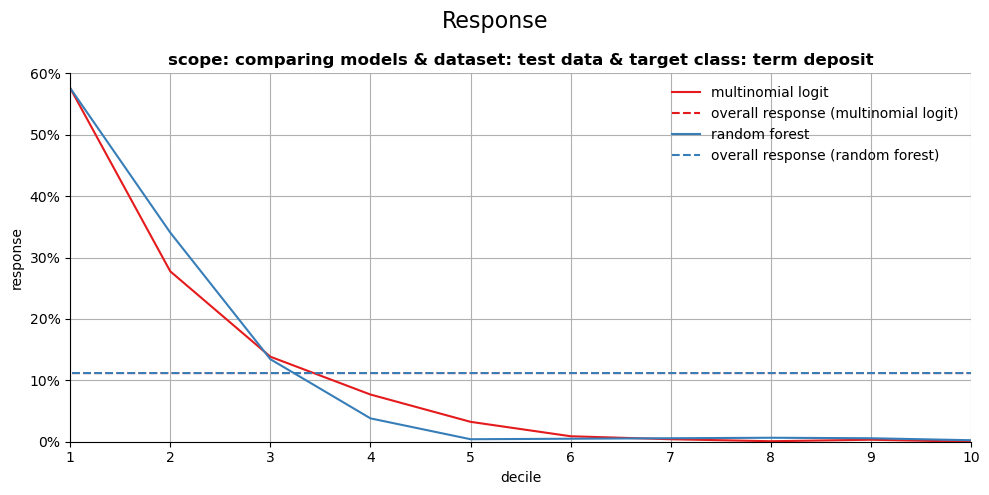

In [14]:
# plot the response plot and annotate the plot at decile = 2
ax = mp.plot_response(
    ps,
    save_fig=True,
)

When we select decile 3 from model multinomial logit in dataset test data the percentage of term deposit cases in the selection is 13% .
When we select decile 3 from model random forest in dataset test data the percentage of term deposit cases in the selection is 13% .


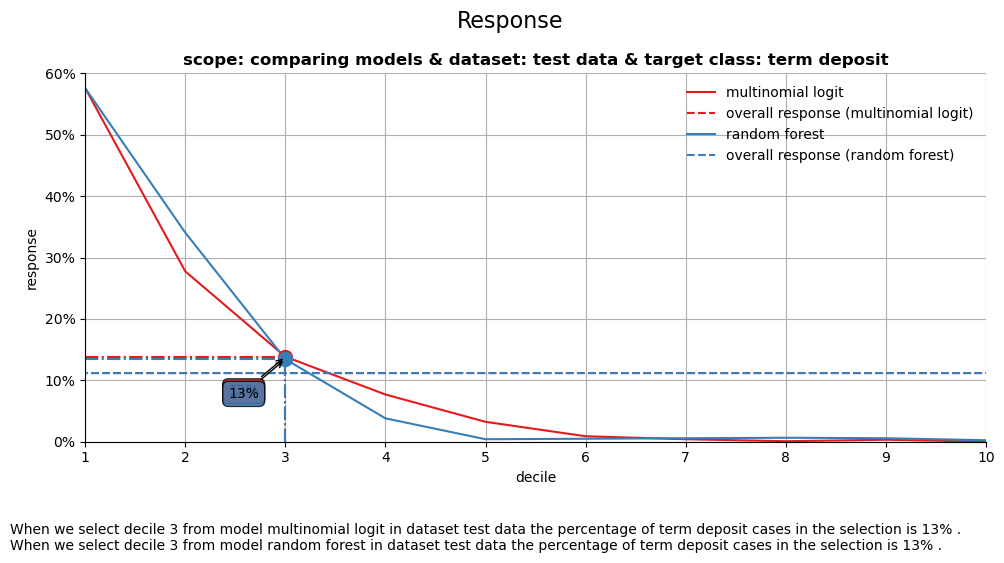

In [15]:
# plot the response plot and annotate the plot at decile = 2
ax = mp.plot_response(
    ps, highlight_ntile=3,
    save_fig=True,
)

When we select decile 2 from model multinomial logit in dataset test data, the response rate for term deposit is 28%.
When we select decile 2 from model random forest in dataset test data, the response rate for term deposit is 34%.
When we select decile 3 from model multinomial logit in dataset test data, the response rate for term deposit is 14%.
When we select decile 3 from model random forest in dataset test data, the response rate for term deposit is 14%.
When we select decile 4 from model multinomial logit in dataset test data, the response rate for term deposit is 8%.
When we select decile 4 from model random forest in dataset test data, the response rate for term deposit is 4%.


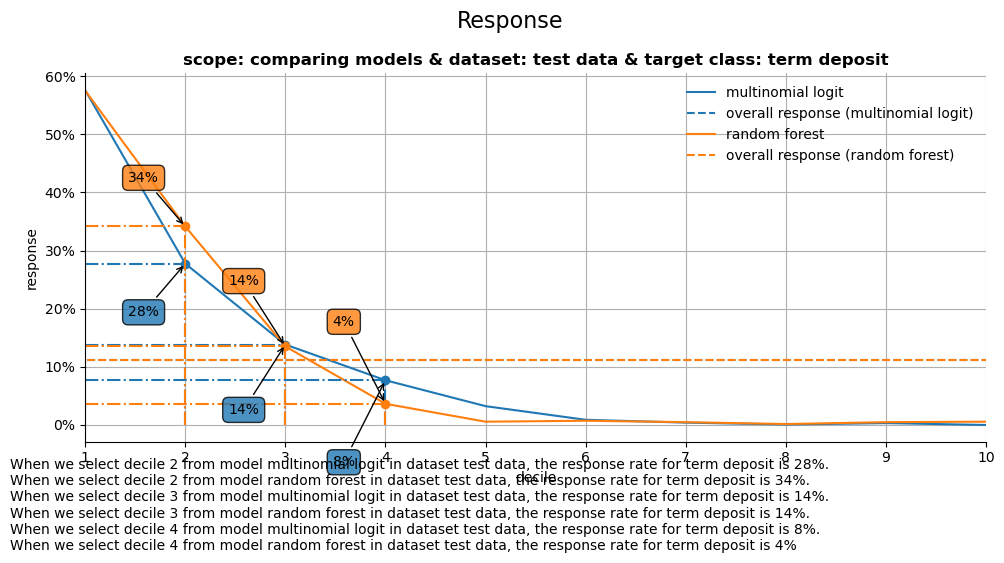

In [16]:
# plot the response plot and annotate the plot at decile = 2
ax = mp2.plot_response(
    ps2, highlight_ntile=[2, 3, 4],
    save_fig=True,
)

When we select decile 3 from model multinomial logit in dataset test data the percentage of term deposit cases in the selection is 33% .
When we select decile 3 from model random forest in dataset test data the percentage of term deposit cases in the selection is 35% .


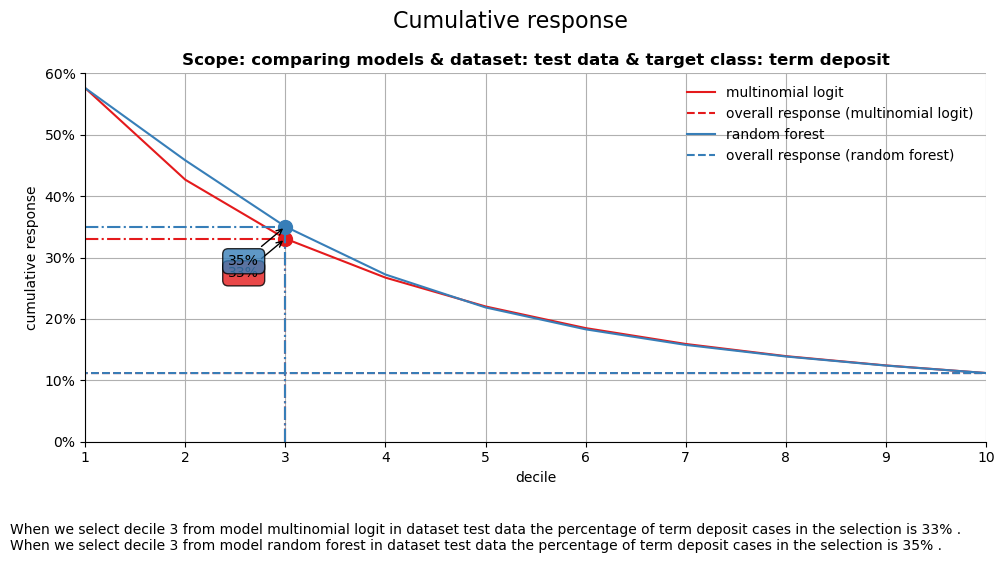

<Axes: title={'center': 'Scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='cumulative response'>

In [17]:
# plot the cumulative response plot and annotate the plot at decile = 3
mp.plot_cumresponse(
    ps, highlight_ntile=3,
    save_fig=True,
)

When we select decile 1 until 2 from model multinomial logit in dataset test data, the cumulative response rate for term deposit is 43%.
When we select decile 1 until 2 from model random forest in dataset test data, the cumulative response rate for term deposit is 46%.
When we select decile 1 until 3 from model multinomial logit in dataset test data, the cumulative response rate for term deposit is 33%.
When we select decile 1 until 3 from model random forest in dataset test data, the cumulative response rate for term deposit is 35%.
When we select decile 1 until 4 from model multinomial logit in dataset test data, the cumulative response rate for term deposit is 27%.
When we select decile 1 until 4 from model random forest in dataset test data, the cumulative response rate for term deposit is 27%.


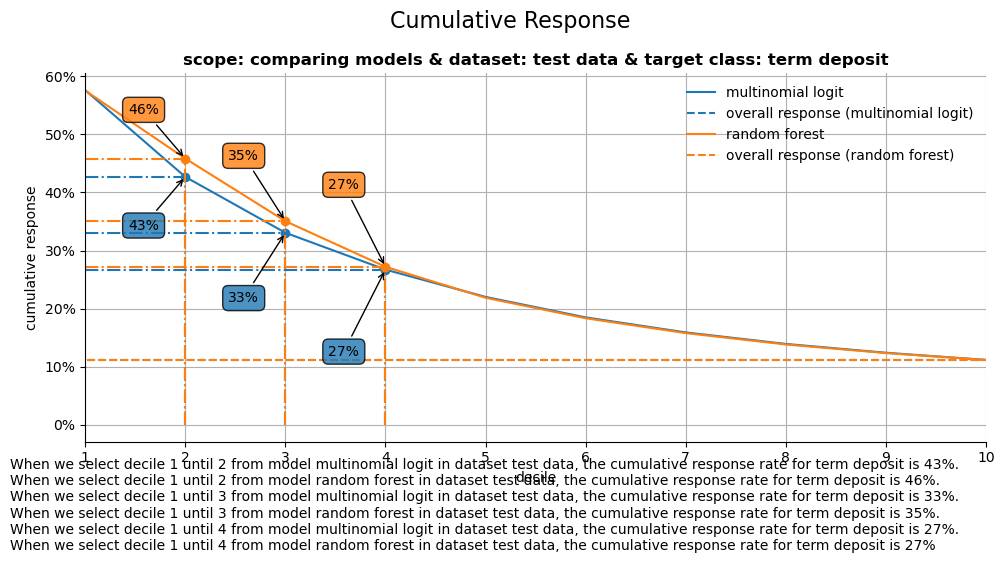

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='cumulative response'>

In [18]:
# plot the cumulative response plot and annotate the plot at decile = 3
mp2.plot_cumresponse(
    ps2, highlight_ntile=[2, 3, 4],
    save_fig=True,
)

When we select 30 with the highest probability according to model multinomial logit, this selection holds 88% of
all term deposit cases in dataset test data.
When we select 30 with the highest probability according to model random forest, this selection holds 93% of
all term deposit cases in dataset test data.


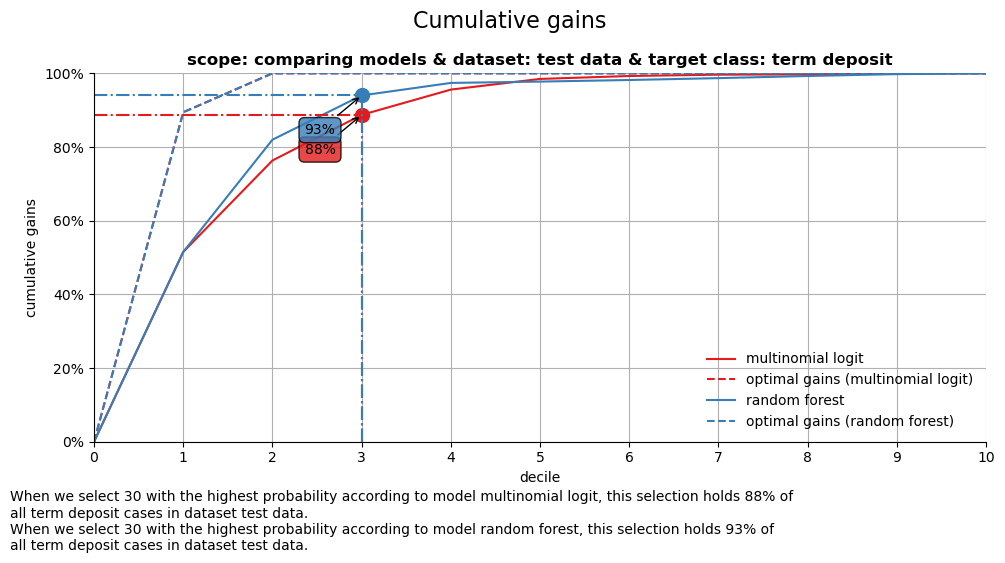

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='cumulative gains'>

In [19]:
# plot the cumulative gains plot and annotate the plot at decile = 2
mp.plot_cumgains(
    ps, highlight_ntile=3,
    save_fig=True,
)

When we select decile 1 until 2 from model multinomial logit in dataset test data, the cumulative gain for term deposit is 76%.
When we select decile 1 until 2 from model random forest in dataset test data, the cumulative gain for term deposit is 82%.
When we select decile 1 until 3 from model multinomial logit in dataset test data, the cumulative gain for term deposit is 89%.
When we select decile 1 until 3 from model random forest in dataset test data, the cumulative gain for term deposit is 94%.
When we select decile 1 until 4 from model multinomial logit in dataset test data, the cumulative gain for term deposit is 96%.
When we select decile 1 until 4 from model random forest in dataset test data, the cumulative gain for term deposit is 97%.


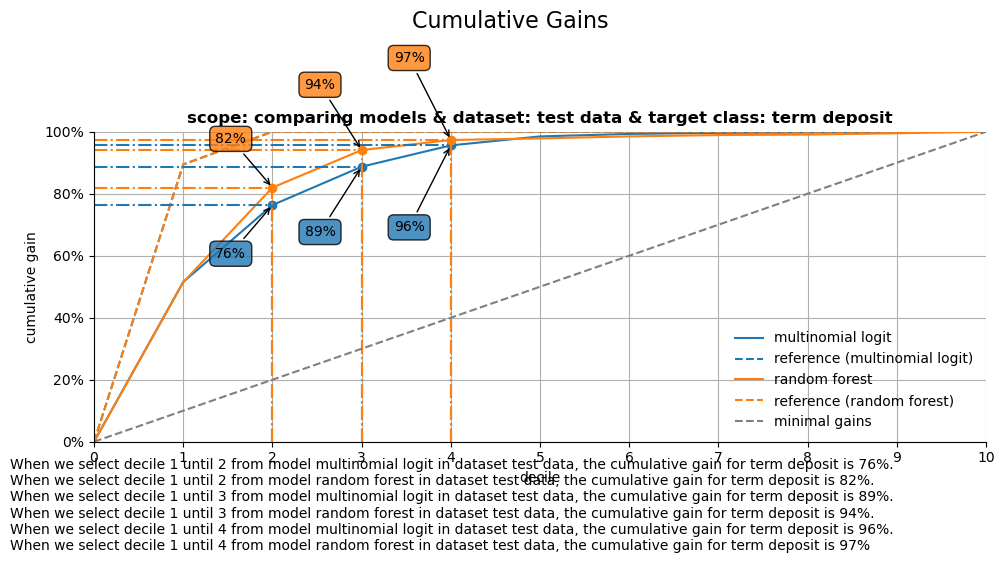

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='cumulative gain'>

In [20]:
# plot the cumulative gains plot and annotate the plot at decile = 2
mp2.plot_cumgains(
    ps2, highlight_ntile=[2, 3, 4],
    save_fig=True,
)

When we select 30 with the highest probability according to model multinomial logit in dataset test data,
this selection for target class term deposit is 2.96 times than selecting without a model.
When we select 30 with the highest probability according to model random forest in dataset test data,
this selection for target class term deposit is 3.13 times than selecting without a model.


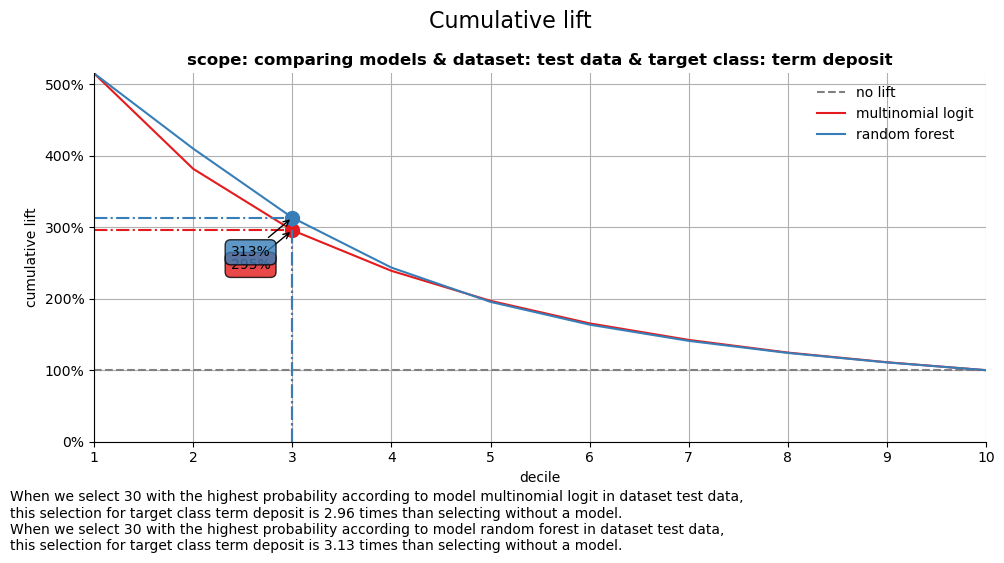

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='cumulative lift'>

In [21]:
# plot the cumulative lift plot and annotate the plot at decile = 2
mp.plot_cumlift(
    ps, highlight_ntile=3,
    save_fig=True
)

When we select decile 1 until 2 from model multinomial logit in dataset test data, the cumulative lift for term deposit is 3.82x.
When we select decile 1 until 2 from model random forest in dataset test data, the cumulative lift for term deposit is 4.10x.
When we select decile 1 until 3 from model multinomial logit in dataset test data, the cumulative lift for term deposit is 2.96x.
When we select decile 1 until 3 from model random forest in dataset test data, the cumulative lift for term deposit is 3.13x.
When we select decile 1 until 4 from model multinomial logit in dataset test data, the cumulative lift for term deposit is 2.39x.
When we select decile 1 until 4 from model random forest in dataset test data, the cumulative lift for term deposit is 2.43x.


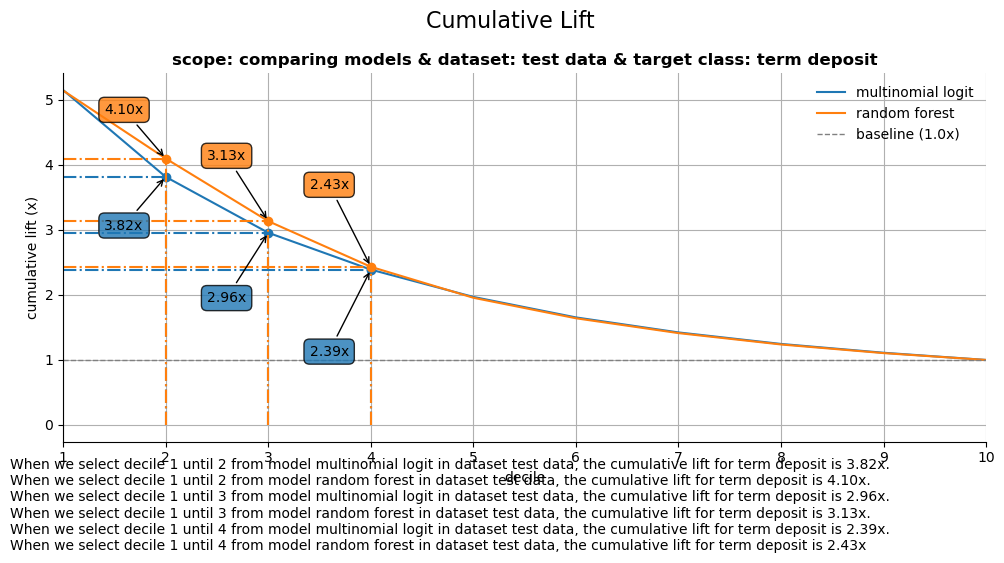

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='cumulative lift (x)'>

In [22]:
# plot the cumulative lift plot and annotate the plot at decile = 2
mp2.plot_cumlift(
    ps2, highlight_ntile=[2, 3, 4],
    save_fig=True
)

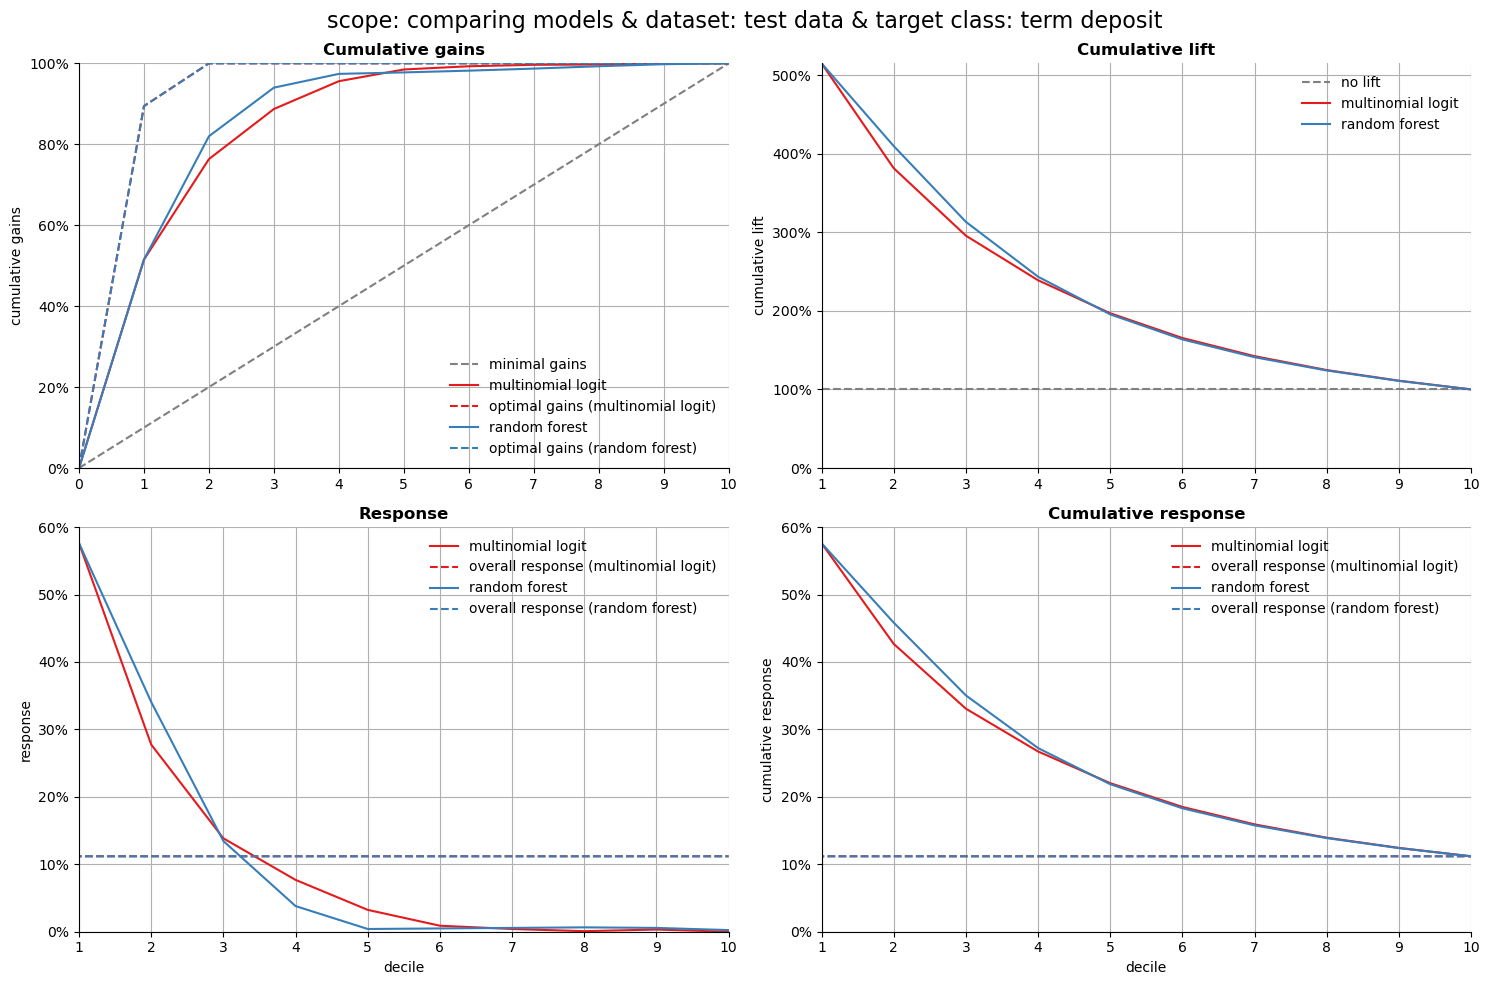

<Axes: title={'center': 'Cumulative gains'}, ylabel='cumulative gains'>

In [23]:
# plot all four evaluation plots and save to file
mp.plot_all(
	ps,
	save_fig = True,
	# save_fig_filename = 'Selection model Term Deposits'
)

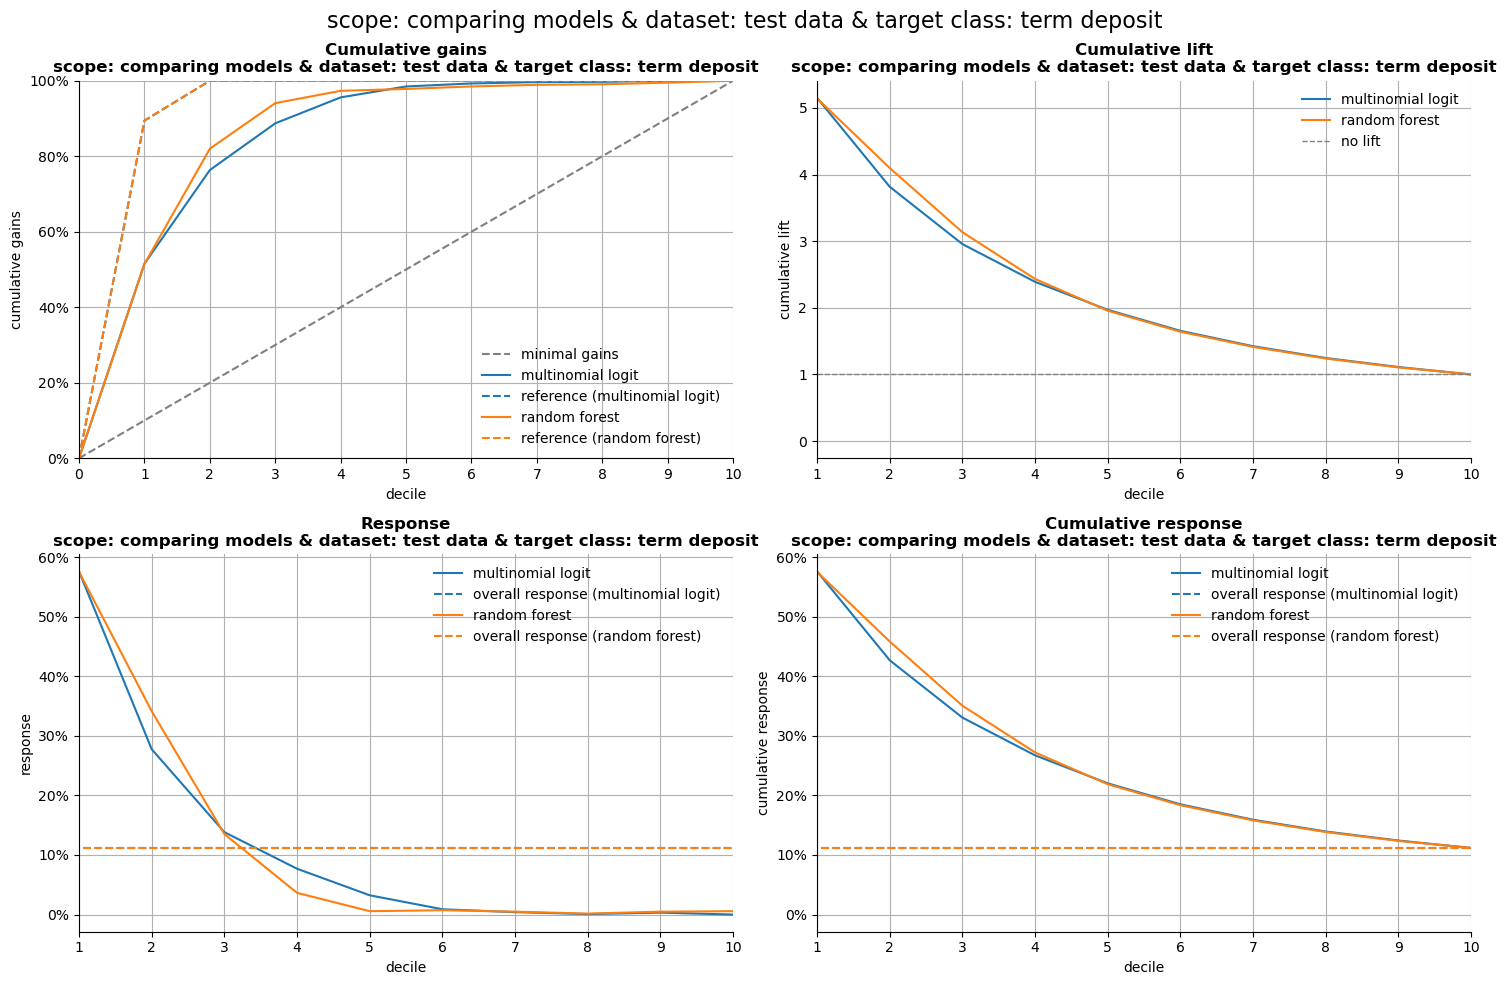

<Axes: title={'center': 'Cumulative gains\nscope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='cumulative gains'>

In [24]:
# plot all four evaluation plots and save to file
mp2.plot_all(
	ps2,
	save_fig = True,
	# save_fig_filename = 'Selection model Term Deposits'
)

## Financial Implications

When we select decile 1 until 3 from model multinomial logit in dataset test data the percentage of term deposit cases in the expected roi is 17.
When we select decile 1 until 3 from model random forest in dataset test data the percentage of term deposit cases in the expected roi is 24.


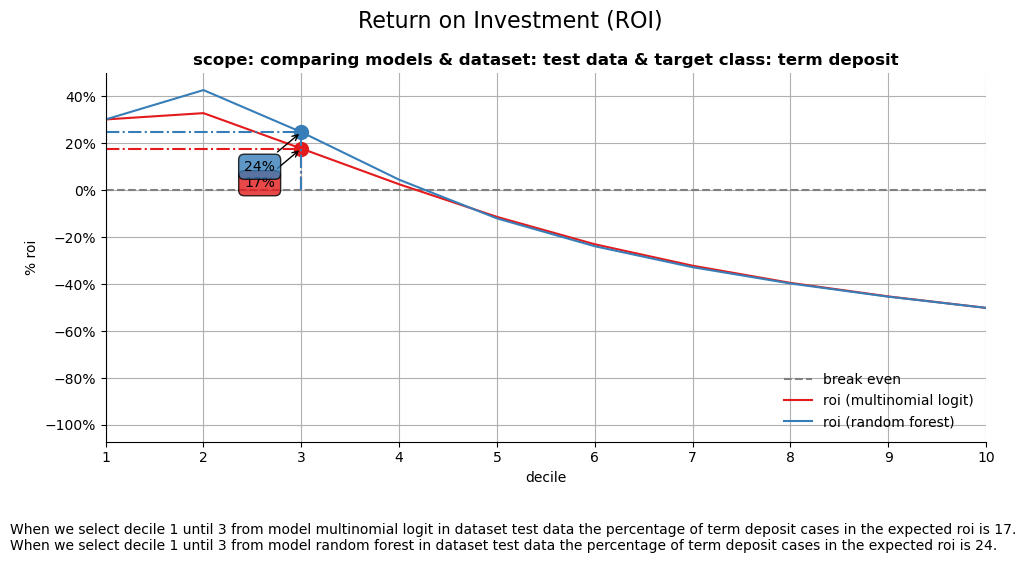

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='% roi'>

In [25]:
mp.plot_roi(
	ps,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True,
    highlight_ntile=3,
)

When we select decile 1 until 2, expected ROI for 'multinomial logit' is 33%.
When we select decile 1 until 2, expected ROI for 'random forest' is 43%.
When we select decile 1 until 3, expected ROI for 'multinomial logit' is 18%.
When we select decile 1 until 3, expected ROI for 'random forest' is 25%.
When we select decile 1 until 4, expected ROI for 'multinomial logit' is 3%.
When we select decile 1 until 4, expected ROI for 'random forest' is 4%.


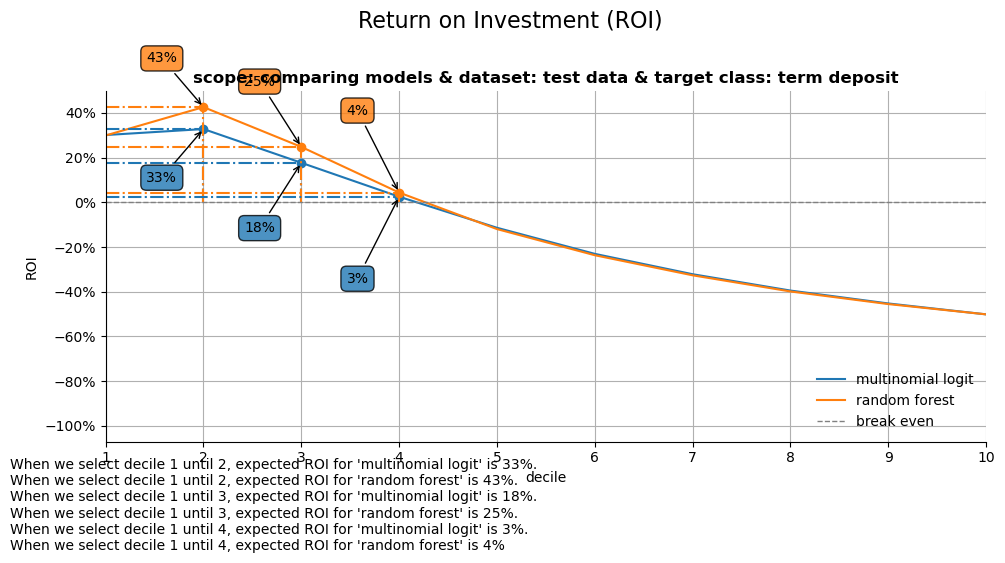

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='ROI'>

In [26]:
mp2.plot_roi(
	ps2,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True,
    highlight_ntile=[2, 3, 4],
)

When we select decile 1 until 3 from model multinomial logit in dataset test data the percentage of term deposit cases in the revenue is 61300.
When we select decile 1 until 3 from model random forest in dataset test data the percentage of term deposit cases in the revenue is 64950.


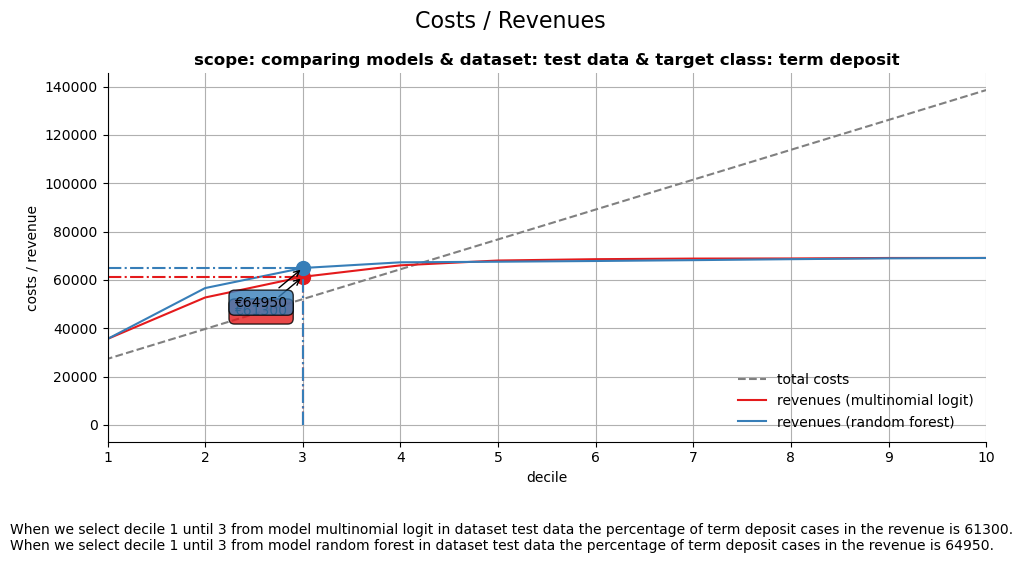

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='costs / revenue'>

In [27]:
mp.plot_costsrevs(
	ps,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True,
    highlight_ntile=3,
)

When we select decile 1 until 2 from model multinomial logit in dataset test data the revenue for term deposit is 52750.
When we select decile 1 until 3 from model multinomial logit in dataset test data the revenue for term deposit is 61300.
When we select decile 1 until 4 from model multinomial logit in dataset test data the revenue for term deposit is 66050.
When we select decile 1 until 2 from model random forest in dataset test data the revenue for term deposit is 56650.
When we select decile 1 until 3 from model random forest in dataset test data the revenue for term deposit is 65000.
When we select decile 1 until 4 from model random forest in dataset test data the revenue for term deposit is 67250.


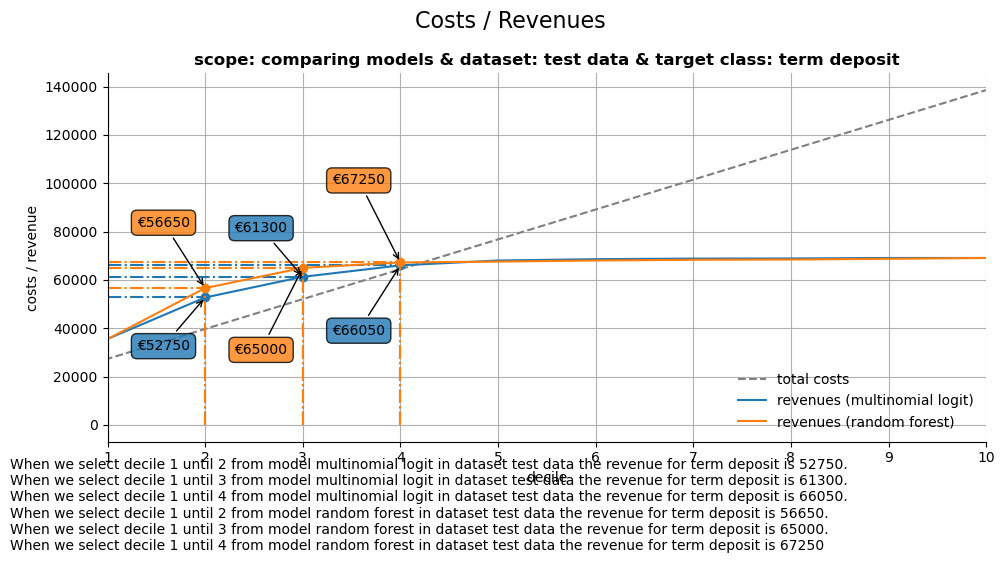

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='costs / revenue'>

In [28]:
mp2.plot_costsrevs(
	ps2,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True,
    highlight_ntile=[2, 3, 4],
)

When we select decile 1 until 2 from model multinomial logit in dataset test data the percentage of term deposit cases in the expected profit is 13030.
When we select decile 1 until 2 from model random forest in dataset test data the percentage of term deposit cases in the expected profit is 16930.


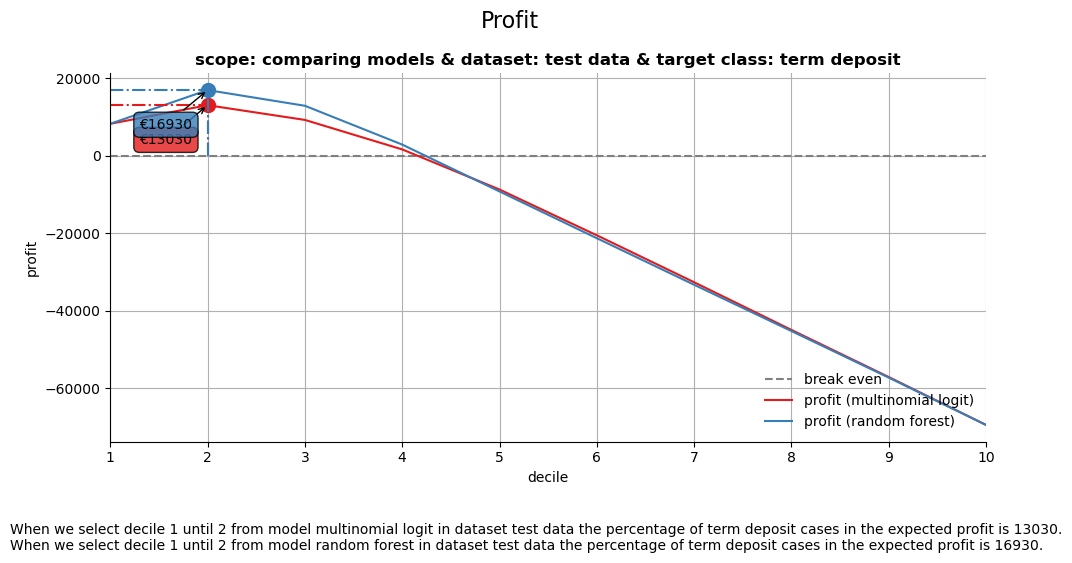

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='profit'>

In [29]:
mp.plot_profit(
	ps,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	highlight_ntile=2,
	save_fig=True,
)

When we select decile 1 until 2, expected profit for 'multinomial logit' is 13030.
When we select decile 1 until 2, expected profit for 'random forest' is 16930.
When we select decile 1 until 3, expected profit for 'multinomial logit' is 9220.
When we select decile 1 until 3, expected profit for 'random forest' is 12920.
When we select decile 1 until 4, expected profit for 'multinomial logit' is 1620.
When we select decile 1 until 4, expected profit for 'random forest' is 2820.


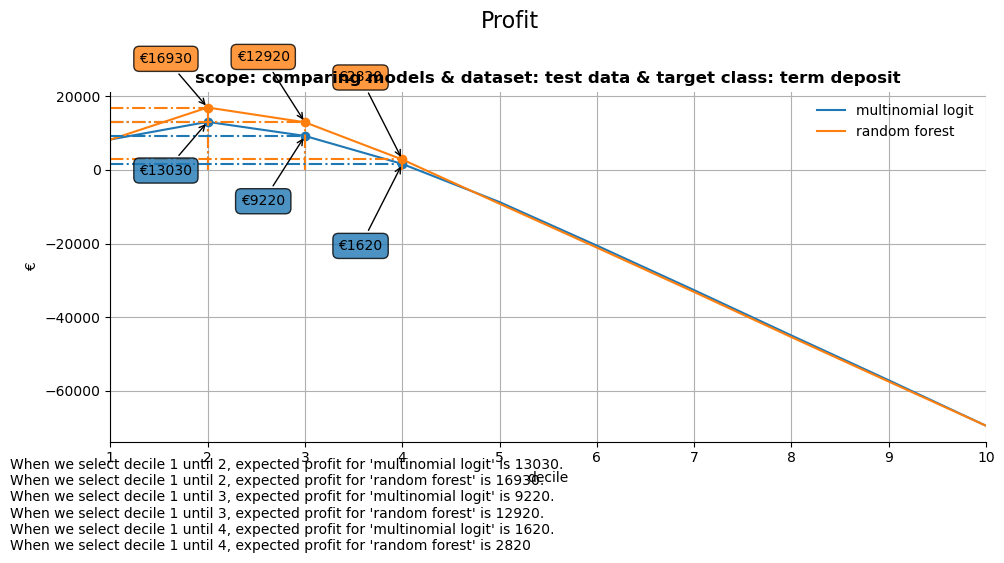

<Axes: title={'center': 'scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='€'>

In [30]:
mp2.plot_profit(
	ps2,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
    highlight_ntile=[2, 3, 4],
	save_fig=True,
)

# Get more out of modelplotpy: using different scopes

In [31]:
# set plotting scope to model comparison
ps3 = obj.plotting_scope(
    scope='no_comparison',
	# select_model_label=['random forest', 'multinomial logit'],
    select_dataset_label=['test data']
)

Default scope value no_comparison selected, single evaluation line will be plotted.
The label with smallest class is term deposit
Target class term deposit, dataset test data and model random forest.


In [32]:
ps3

,model_label,dataset_label,target_class,ntile,tot,pos,neg,pct,postot,negtot,...,cumpct,gain,cumgain,gain_ref,pct_ref,gain_opt,lift,cumlift,cumlift_ref,scope
0,random forest,test data,term deposit,0,0,0,0,0.000000,0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1,no_comparison
30,random forest,test data,term deposit,1,1236,712,524,0.576052,1382,10975,...,0.576052,0.515195,0.515195,0.1,0.111839,0.894356,5.150703,5.150703,1,no_comparison
31,random forest,test data,term deposit,2,1236,421,815,0.340615,1382,10975,...,0.458333,0.304631,0.819826,0.2,0.111839,1.000000,3.045570,4.098137,1,no_comparison
32,random forest,test data,term deposit,3,1235,166,1069,0.134413,1382,10975,...,0.350418,0.120116,0.939942,0.3,0.111839,1.000000,1.201839,3.133225,1,no_comparison
33,random forest,test data,term deposit,4,1236,47,1189,0.038026,1382,10975,...,0.272304,0.034009,0.973951,0.4,0.111839,1.000000,0.340004,2.434778,1,no_comparison
34,random forest,test data,term deposit,5,1235,5,1230,0.004049,1382,10975,...,0.218679,0.003618,0.977569,0.5,0.111839,1.000000,0.036200,1.955296,1,no_comparison
35,random forest,test data,term deposit,6,1236,6,1230,0.004854,1382,10975,...,0.183032,0.004342,0.981910,0.6,0.111839,1.000000,0.043405,1.636561,1,no_comparison
36,random forest,test data,term deposit,7,1236,7,1229,0.005663,1382,10975,...,0.157688,0.005065,0.986975,0.7,0.111839,1.000000,0.050639,1.409949,1,no_comparison
37,random forest,test data,term deposit,8,1235,8,1227,0.006478,1382,10975,...,0.138796,0.005789,0.992764,0.8,0.111839,1.000000,0.057920,1.241030,1,no_comparison
38,random forest,test data,term deposit,9,1236,7,1229,0.005663,1382,10975,...,0.124000,0.005065,0.997829,0.9,0.111839,1.000000,0.050639,1.108729,1,no_comparison


When we select decile 3 from model random forest in dataset test data the percentage of term deposit cases in the selection is 35% .


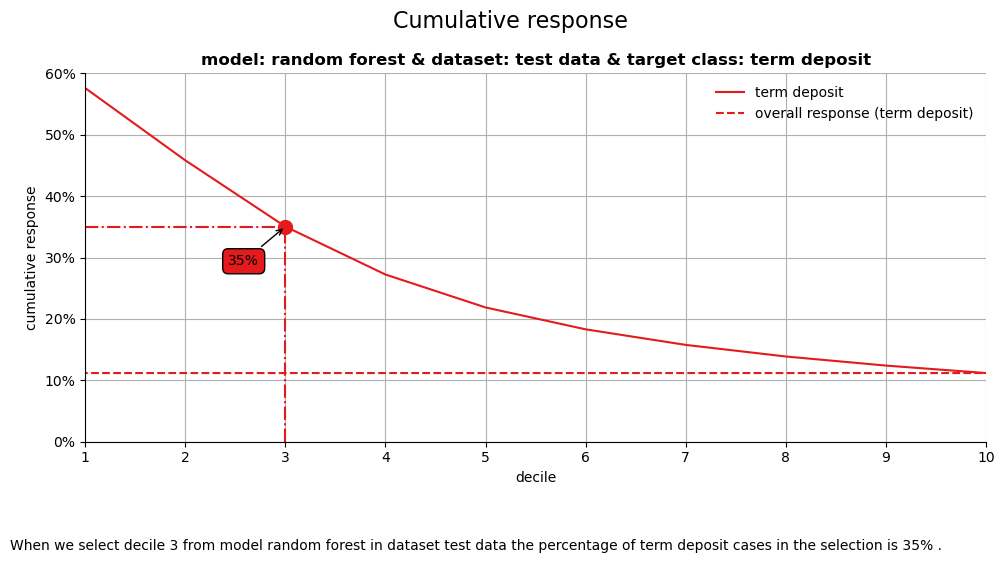

<Axes: title={'center': 'model: random forest & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='cumulative response'>

In [33]:
# plot the cumulative response plot and annotate the plot at decile = 3
mp.plot_cumresponse(
    ps3, highlight_ntile=3,
    save_fig=True
)

In [34]:
# set plotting scope to model comparison
ps4 = obj2.plotting_scope(
    # scope='no_comparison',
	select_model_label=['random forest'],
    select_dataset_label=['test data'],
    # select_targetclass=['term deposit'],
)

In [35]:
ps4

,model_label,dataset_label,target_class,ntile,tot,pos,neg,pct,postot,negtot,...,cumpct,gain,cumgain,gain_ref,pct_ref,gain_opt,lift,cumlift,cumlift_ref,scope
55,random forest,test data,term deposit,0,0,0,0,0.000000,1382,10975,...,0.000000,0.000000,0.000000,0.0,0.111839,0.000000,0.000000,0.000000,1.0,no_comparison
56,random forest,test data,term deposit,1,1236,711,525,0.575243,1382,10975,...,0.575243,0.514472,0.514472,0.1,0.111839,0.894356,5.143469,5.143469,1.0,no_comparison
57,random forest,test data,term deposit,2,1236,422,814,0.341424,1382,10975,...,0.458333,0.305355,0.819826,0.2,0.111839,1.000000,3.052804,4.098137,1.0,no_comparison
58,random forest,test data,term deposit,3,1236,167,1069,0.135113,1382,10975,...,0.350593,0.120839,0.940666,0.3,0.111839,1.000000,1.208100,3.134791,1.0,no_comparison
59,random forest,test data,term deposit,4,1235,45,1190,0.036437,1382,10975,...,0.272102,0.032562,0.973227,0.4,0.111839,1.000000,0.325800,2.432970,1.0,no_comparison
60,random forest,test data,term deposit,5,1236,7,1229,0.005663,1382,10975,...,0.218806,0.005065,0.978292,0.5,0.111839,1.000000,0.050639,1.956426,1.0,no_comparison
61,random forest,test data,term deposit,6,1236,9,1227,0.007282,1382,10975,...,0.183547,0.006512,0.984805,0.6,0.111839,1.000000,0.065107,1.641164,1.0,no_comparison
62,random forest,test data,term deposit,7,1235,6,1229,0.004858,1382,10975,...,0.158035,0.004342,0.989146,0.7,0.111839,1.000000,0.043440,1.413050,1.0,no_comparison
63,random forest,test data,term deposit,8,1236,2,1234,0.001618,1382,10975,...,0.138479,0.001447,0.990593,0.8,0.111839,1.000000,0.014468,1.238192,1.0,no_comparison
64,random forest,test data,term deposit,9,1236,6,1230,0.004854,1382,10975,...,0.123629,0.004342,0.994935,0.9,0.111839,1.000000,0.043405,1.105414,1.0,no_comparison


When we select decile 1 until 3 from model random forest in dataset test data, the cumulative response rate for term deposit is 35%.
When we select decile 1 until 4 from model random forest in dataset test data, the cumulative response rate for term deposit is 27%.


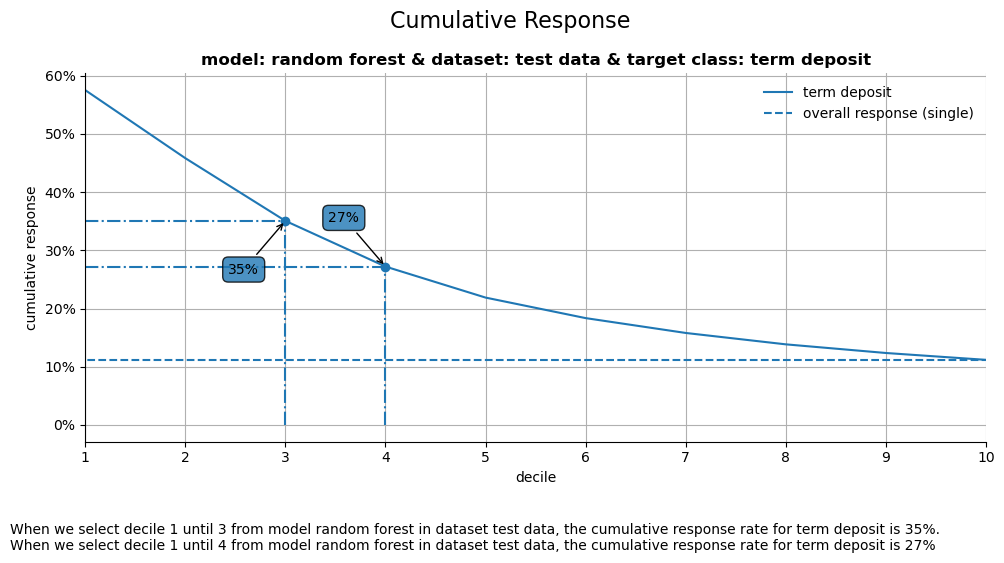

<Axes: title={'center': 'model: random forest & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='cumulative response'>

In [36]:
# plot the cumulative response plot and annotate the plot at decile = 3
mp2.plot_cumresponse(
    ps4, highlight_ntile=[3, 4],
    save_fig=True
)

When we select decile 1 until 3 from model random forest in dataset test data the percentage of term deposit cases in the revenue is 64950.


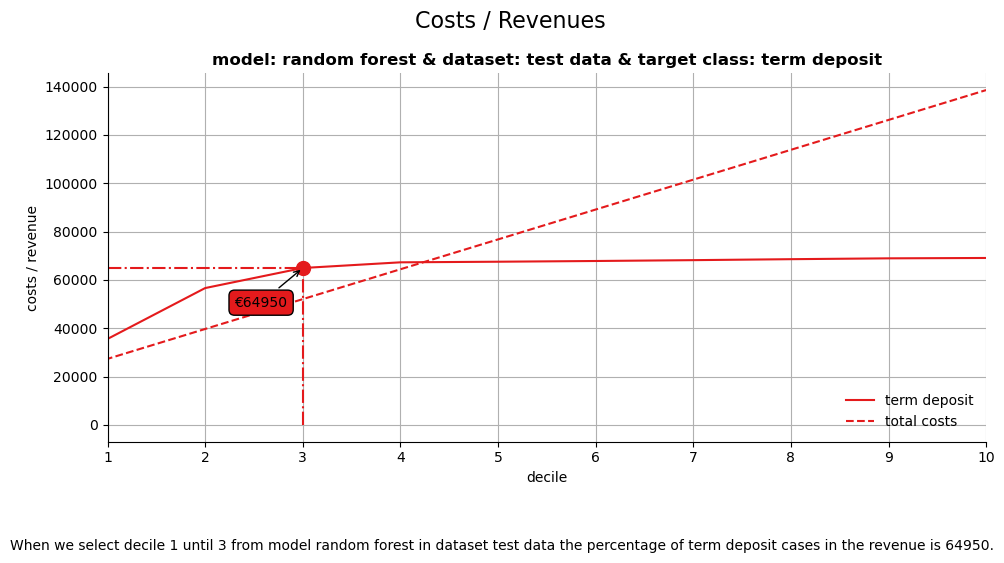

<Axes: title={'center': 'model: random forest & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='costs / revenue'>

In [37]:
mp.plot_costsrevs(
	ps3,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True, highlight_ntile=3,
)

When we select decile 1 until 3 from model random forest in dataset test data the revenue for term deposit is 65000.
When we select decile 1 until 4 from model random forest in dataset test data the revenue for term deposit is 67250.


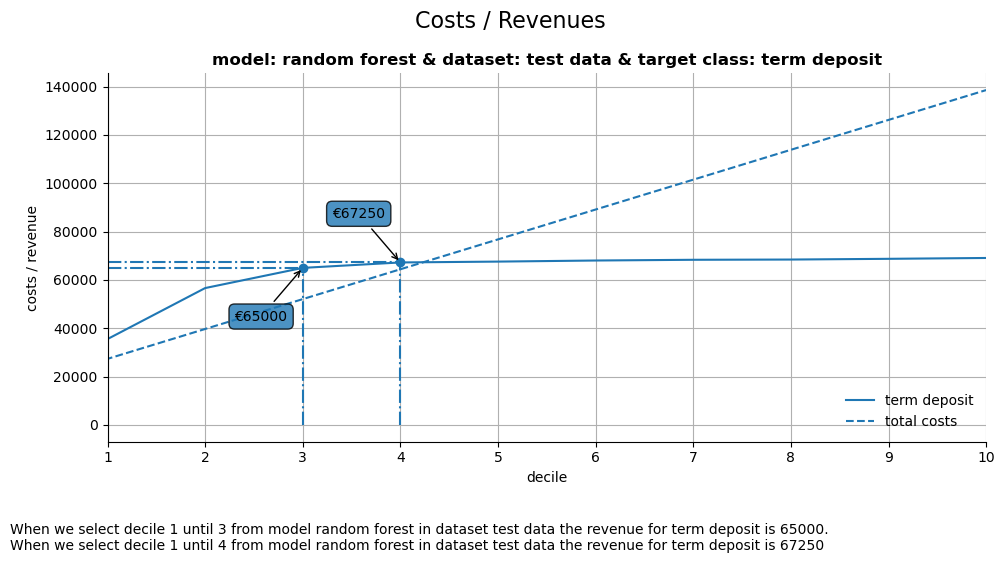

<Axes: title={'center': 'model: random forest & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='costs / revenue'>

In [38]:
mp2.plot_costsrevs(
	ps4,
	fixed_costs=15000,
	variable_costs_per_unit=10,
	profit_per_unit=50,
	save_fig=True, highlight_ntile=[3, 4],
)

In [39]:
# from IPython.core.display import display,HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
# np.set_printoptions(linewidth=110)